# **Training Models**
## **Linear Regression**
Linear model makes prediction by simply computing a weighted sum of the input features, plus a constant called the bias term(also known as the intercept term)
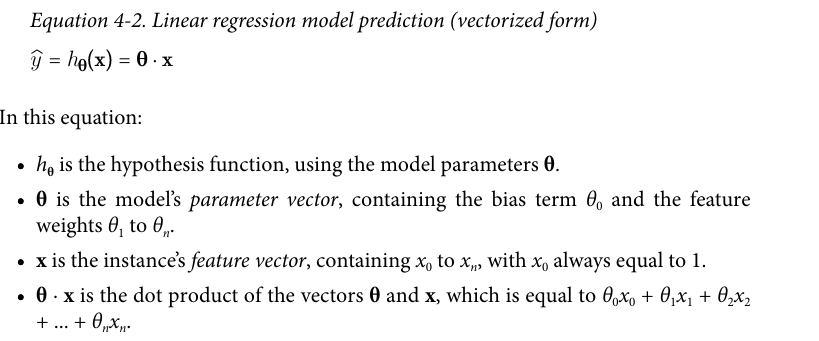

Linear model is trained by setting its parameter so that model best fits the training set. But how?

We need a performance measure and find parameter vectorthat minimizes the performance measure(usually MSE is used instead of RMSE as it is easier to minimize)

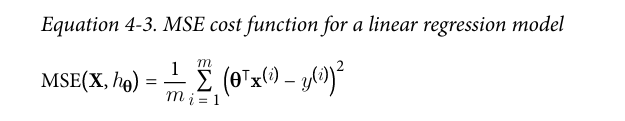

To find the value of theta that minimizes the MSE, ther exists a closed-form solution(i.e. a mathematical equation that gives the result directly). This is called the **Normal Equation**

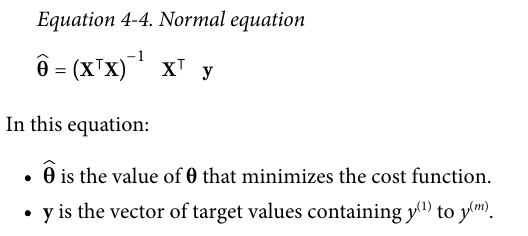

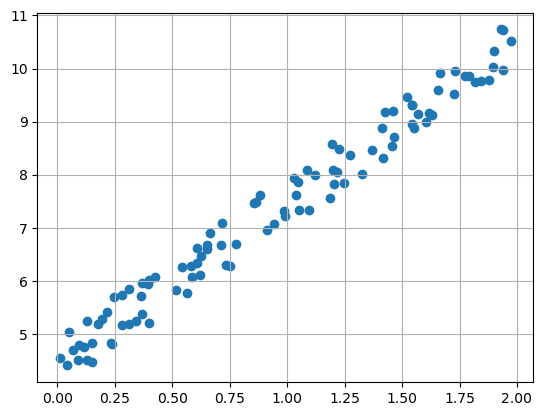

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
m = 100 #number of instances
X = 2 * np.random.rand(m,1) # column vector
y = 4 + 3*X + np.random.rand(m,1) # column vecotor
plt.scatter(X,y)
plt.grid()
plt.show()

Let's calculate the theta using np.linalg

In [2]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)     #adds dummy feature i.e. x0 = 1 to all instances
theta_best = np.linalg.inv(X_b.T @ X_b)@X_b.T@y
print(theta_best)

[[4.51359766]
 [2.98323418]]


@ operator performs matrix multiplication in case two arrays are NumPy arrays

We expected the result to be 4 and 3 but this is also good considering the noise we added to the y variable

In [3]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
print(y_predict)

[[ 4.51359766]
 [10.48006601]]


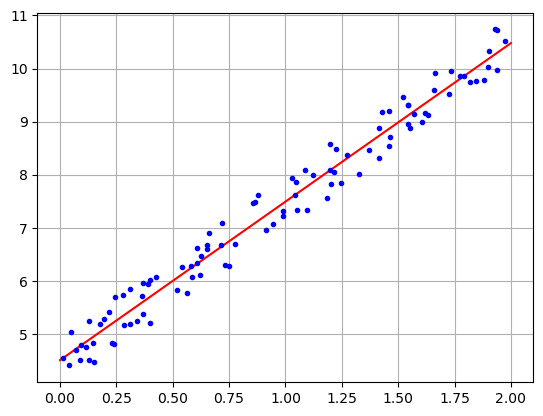

In [4]:
plt.plot(X_new,y_predict,"r-",label="Predictions")
plt.plot(X,y,"b.")
plt.grid()
plt.show()

We see that we get a good result but it is even easier to use scikit learn to perform Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_,lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.51359766] [[2.98323418]]
[[ 4.51359766]
 [10.48006601]]


The LinearRegression implementation of sklearn seperates the intercept and coefficient as it uses SVD approach to calculate reducing its time complexity as well, but as the the training time for both method increases as number of instances/features increase linearly

## **Gradient Descent**
unlike the normal equation, gradient descent is a generic optimization algorithm which is capable of finding optimal solution to a wide range of problems.

>Working: it intializes parameter randomly and tweaks the parameters iteratively in order to minimize the cost function

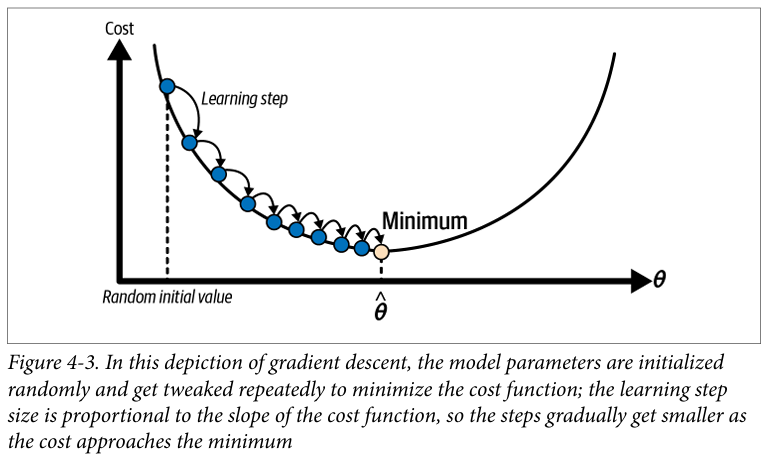

>*Learning Rate*: the hyperparameter that defines how long does the algorithm takes to reach the optimal solution and how accurate it is
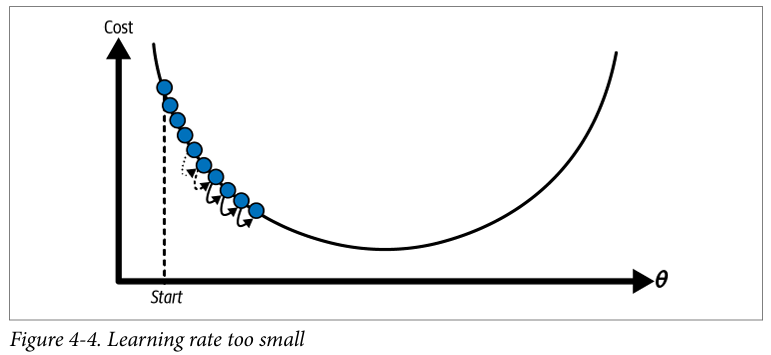

if the learning rate is too small it will eventually reach the optimal solution but will take a lot of time
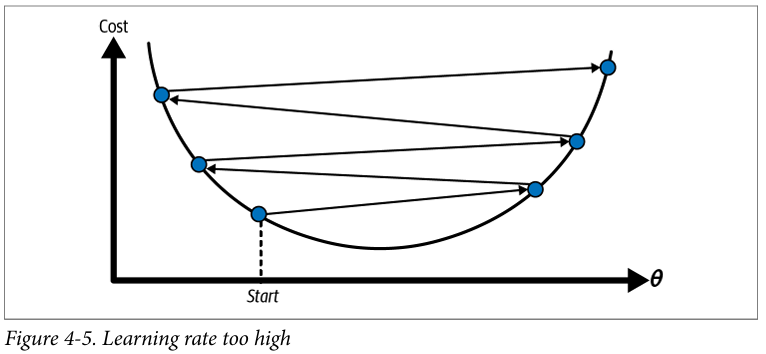

if the learning rate is too big instead of converging it will bounce around without reaching the solution

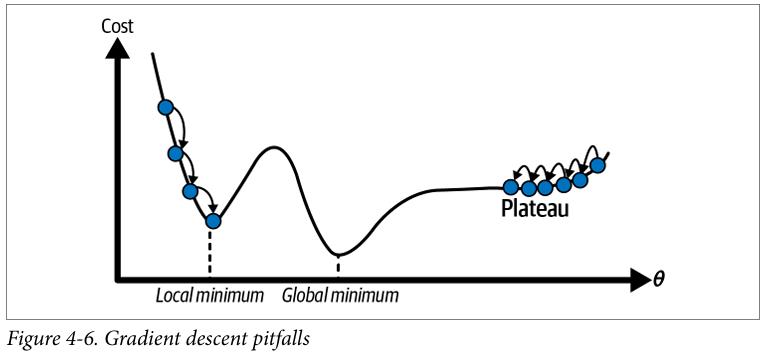

also as seen in the above image gradient descent works the best for convex fucntions, in case of non-convex fuctions it might never converge, be stuck in local minimum or take a long time to converge

>!!It is best to use scaling before applying gradient descent in order to allow it to converge faster!!

1) Batch Gradient descent: Uses the entire training set on each step of gradient descent (computes the gradient using the entire dataset at once instead of calculating it for each instance one by one), which makes it terribly slow for large training sets

2) Stochastic Gradient descent: Unlike the Batch Gradient Descent, it selects randomly one instance at every step to compute the gradient which makes it comparitively faster to train on large datasets BUT the cost function instead of gently decreasing as it reaches the minima, it will move eratically bouncing up and down decreasing only on average and upon reaching near the minima it will keep bouncing around making the parameters found to be good not optimal

    This randomness is good to get out of local minima but not good for optimal solution, the solution is simulated annealing - reducing the learning rate as the number of steps increases, it is controlled using the *learning schedule* but it can be hard to find a good learning schedule as if too quick it will freeze midway if too slow it will keep bouncing around

    from sklearn.linear_model import SGDRegressor
    SGDRegressor(max_iter(maximum no. of iterations allowed),tol(the value for c),eta0(starting learning rate),n_iter_no_change(no changes in learning rate for))

3) Mini-Batch Gradient Descent: This model tries to strike a balance between the above two it calculates the gradient at each step based on small random batches, it inherits both advantages and disadvantages, it will go closer to the minima comparted to SGD but will find it hard to get out of local minima and is faster than Batch but finds a good solution but not optimal

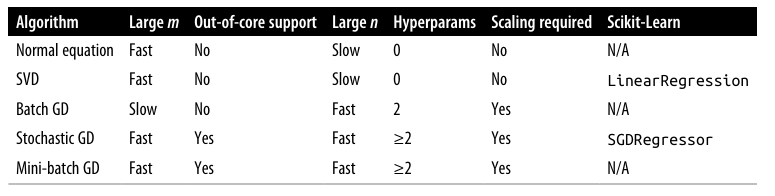

How to set number of epchs? If too low it will stop away from optimal solution or if too many it will waste time

Choose a large number of epochs and set the tolerance parameter c, such that gradient descent stops when the gradient vector is smaller than c

## **Polynomial Regression**
It handles more complex datasets than the linear regression by adding powers of each feature as new features and training a linear model on this extended set of features

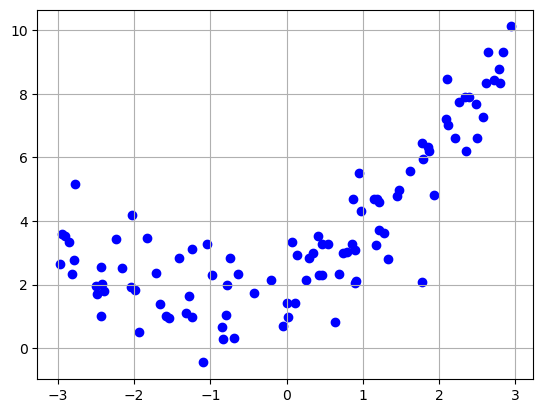

In [6]:
m = 100
X = 6 * np.random.rand(m, 1) - 3  # X values between -3 and 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)  # Quadratic function with noise

plt.scatter(X, y, color='b')  # Use 'b' for blue points
plt.grid()  # Add grid to the plot
plt.show()  # Show the 

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[0.85218988]
[0.85218988 0.72622759]


In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
print(lin_reg.intercept_,lin_reg.coef_)

[2.03442356] [[1.04798249 0.50985053]]


we get two values in coeff one for X and one for X^2

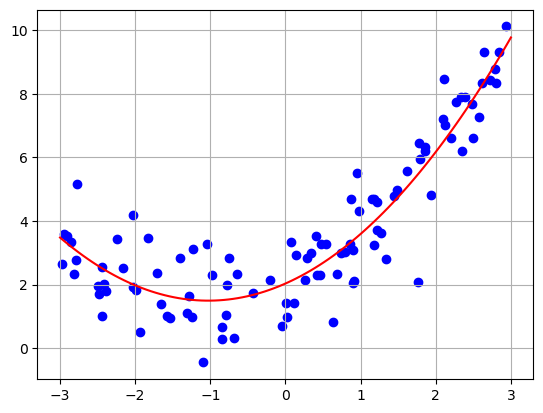

In [9]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)  # 100 points between -3 and 3 for a smooth curve
X_poly_new = poly_features.transform(X_new)  # Transform new data points to polynomial features
y_pred = lin_reg.predict(X_poly_new)  # Predict using the trained model

# Plot the original data and the polynomial regression curve
plt.scatter(X, y, color='b')  # Scatter plot of original data
plt.plot(X_new, y_pred, color='r')  # Polynomial regression curve
plt.grid()  # Add grid
plt.show()  # Show the plot

PolynomialFeatures adds not only simply a^2, a, in case of two variables a and b and degree = 3 it will add the features a^3,b^3,a^2,b^2,a,b also combinations ab, a^2b,ab^2

## **Learning Curves**

As we keep on adding more polynomial features it will fit the data better, if we reduce them it will not fit as seen in the image below

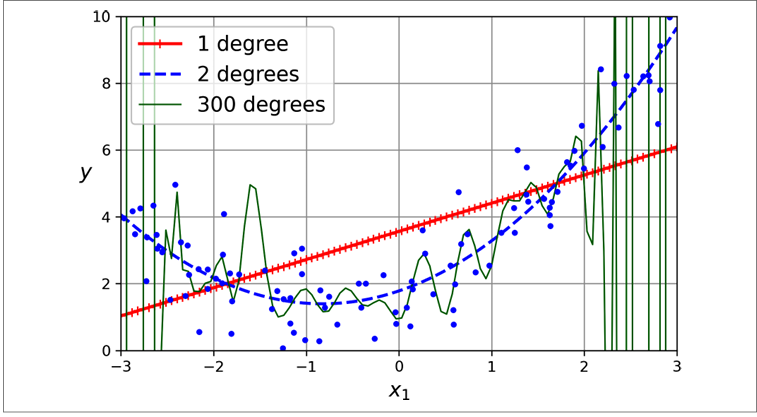

Too many features will lead to overfitting and too few will lead to underfitting, degree = 2 fits the data perfectly as we know we created the dataset using that but how to do in case we have no prior knowledge of how the dataset was created?

Learning curves, plot the model's training error and validation error as a function of the training iteration: just evaluate the model at regular intervals during training on both the training and validation set and plot the results.

The best option as not all models support partial_fit() is to use the scikit-learn *learning_curve()* function, by default it trains the model on growing subsets of training set, but if the model supports incremental learning set *exploit_incremental_learning=True* it will train the model incrementally. 

The function returns: training set sizes at which model is evaluated, its training and validation error for each fold of the cross-validation

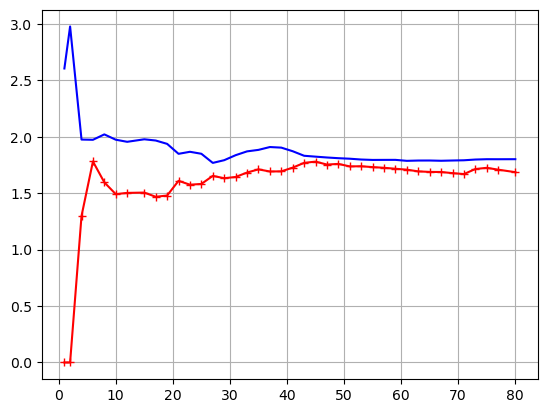

In [10]:
from sklearn.model_selection import learning_curve

train_sizes,train_scores,val_scores = learning_curve(LinearRegression(),X,y,train_sizes=np.linspace(0.01,1.0,40),cv=5,scoring="neg_root_mean_squared_error")
train_erros = -train_scores.mean(axis=1)  #finds mean along the column
val_errors = -val_scores.mean(axis=1)  
plt.plot(train_sizes,train_erros,"r-+",label="train")
plt.plot(train_sizes,val_errors,"b-",label="val")
plt.grid()
plt.show()


The above is an example of underfitting. Why?

1) At the starting the model fits the dataset perfectly, as the dataset increases the training error increases and plateaus
2) The validation error starts high as expected then it decreases and then it reaches the other curve and plateaus

How to overcome underfitting?

Underfitting means that the model is too simple to understand the intricacies of the dataset therefore high bias and low variance, increasing data instances won't help instead it is required to use better features or a better model

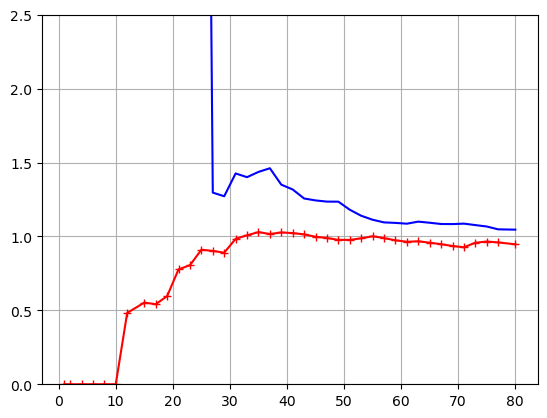

In [11]:
from sklearn.pipeline import make_pipeline
polynomial_regression = make_pipeline(PolynomialFeatures(degree=10,include_bias=False),LinearRegression())
train_sizes,train_scores,val_scores = learning_curve(polynomial_regression,X,y,train_sizes=np.linspace(0.01,1.0,40),cv=5,scoring="neg_root_mean_squared_error")
train_erros = -train_scores.mean(axis=1)  #finds mean along the column
val_errors = -val_scores.mean(axis=1)  
plt.plot(train_sizes,train_erros,"r-+",label="train")
plt.plot(train_sizes,val_errors,"b-",label="val")
plt.ylim(0, 2.5)
plt.grid()
plt.show()

The above is an example of overfitting. Why?

1) There is a gap between the training and validation error that means the model performs good on the training data but not the same on the validation set, it would converge eventually
2) The training error is less compared to the underfitting model

How to solve overfitting?

Overfitting is caused by high variance(error due to data intricancies) and low bias(error due to model assumptions) the solution is to feed it more data till the training and validation error converge

Increasing model complexity will increase the variance and decrease bias, decreasing model complexity increases the bias and decreses the variance

## **Regularized linear Models**

One of the solution to overfitting is to regularize the model(constrain the parameters), for polynomial model that means reduce the number of polynomial degrees and for linear regression it is achieved by constraining the weights

### **Ridge regression**
Regularized version of linear regression, it adds a regularization term to the MSE

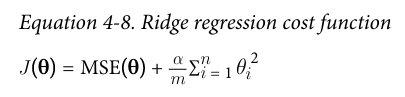

this forces the model to not only fit the data but also keep the model as small as possible

the hyperparameter alpha controls how much one wants to regularize the model, if 0 the ridge regression is regular linear regression but if very large then all weights will end up very close to zero i.e. a line going through data's mean

!! It is important to scale data before performing ridge regression, as it is sensitive to the scale of input features (it is same for all regularized models)

!! The regularization term should only be added to the cost function during training, once the model has been trained use unregularized RMSE to evaluate the model's performance

!! Ridge regression uses the l2 norm of the weight vector

Similar to linear regression ridge regression has a closed-form solution

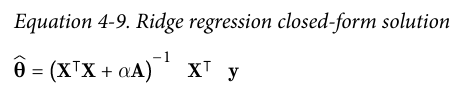

Here A is a (n+1) x (n+1) identity matric, except a 0 at the top left, for the bias term

In [13]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1,solver="cholesky")
ridge_reg.fit(X,y)
print(ridge_reg.predict([[1.5]]))

[[5.11702502]]


In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg  = SGDRegressor(penalty="l2",alpha=1/m,tol=None,max_iter=100,eta0=0.01,random_state=42)
sgd_reg.fit(X,y.ravel())  
print(sgd_reg.predict([[1.5]]))

[5.11228429]


There is also RidgeCV it can be thought of an optimization of Ridge Regression + GridSearchCV there are similary LassoCV and ElasticNetCV

### **Lasso Regression##
Least absolute shrinkage and selection operator regression is another regularized version of linear regression, it adds an l1 norm of the weight vector. The cost function is give below:
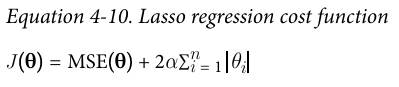

The key feature of ℓ1 regularization is that it tends to push parameters toward zero.

!! Lasso regression tends to eliminate the weights of the least important features(i.e. set them to zero)
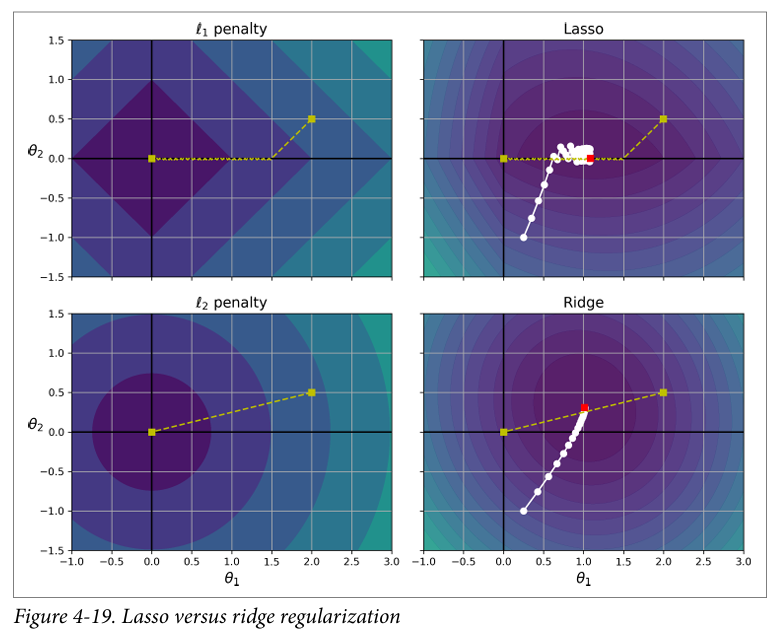

the top left image contour shows l1 loss abs(theta1 + theta2), starting from theta2=0.5 and theta1=2.0, drops linearly(shown by yellow line) as it gets close to axis, it first falls to theta2=0(as it was closer) and then roles till theta1=0. because the gradient of ℓ1 is constant (either -1 or 1), this process involves some bouncing around before reaching the optimal solution 

the top right image contour shows lasso regression's cost function(MSE + l1 loss), the white circle shows how it moves sharply to theta2=0 then rolls down the gutter and bounces around the global optima, if alpha is increased it will move left along the line and right if alpha is increased

the bottom left plot shows l2 loss decreases as we get closer to origin so gradient descent just goes directly and is no bouncing around like in the case of l1 norm

the bottom right plot countour shows ridge regression's cost function, the gradients get smaller as we reach the global optimum and automatically converges

!! to keep gradient descent from bouncing around while using lasso regression, one needs to gradually decrease learning rate

In [15]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
print(lasso_reg.predict([[1.5]]))

[5.07204068]


### **Key Differences Between ℓ1 and ℓ2 Regularization**:

Effect on Parameters:

ℓ1 (Lasso): Tends to drive parameters exactly to zero, leading to sparse models (some parameters are eliminated).

ℓ2 (Ridge): Shrinks parameters towards zero but does not eliminate them entirely.

Gradient Behavior:

ℓ1: The gradient is constant (either -1 or 1), which leads to oscillation or "bouncing" as the model parameters approach zero. This is why Lasso regression can be slower and 
more erratic.

ℓ2: The gradient decreases smoothly as the parameters approach zero, leading to smoother and faster convergence without much bouncing around.
Convergence:

ℓ1 (Lasso) often involves more oscillation and a slower convergence to the optimal solution because of the sharp transition in the gradient.

ℓ2 (Ridge) allows for a smoother convergence to the optimal point due to the continuous nature of the gradients.

Effect of α (Regularization Strength):

Increasing 𝛼pushes the parameters closer to zero for both regularization types, but for ℓ1 (Lasso), some parameters may even be eliminated (set to zero).For ℓ2 (Ridge), increasingα reduces the parameter values without eliminating them completely, keeping the parameters small but non-zero.

In summary, Lasso (ℓ1) is effective for feature selection because it drives some parameters to zero, while Ridge (ℓ2) tends to shrink all parameters gradually but does not eliminate them. The choice between ℓ1 and ℓ2 depends on whether sparsity or shrinkage is more important for the model.

### **Elastic Net Regression**
It tries to find the middle ground between ridge and lasso regresstion. The regularization term is a weighted sum of both ridge and lasso's regularization term, and you can control the mix of the ratio using r.

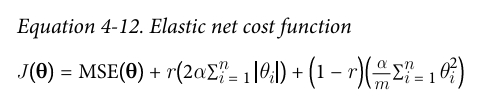

When to use what type of regression?

- Plain Linear Regression: Use when you have a small number of features and no concerns about overfitting. Generally, avoid it for larger datasets or high-dimensional problems.

- Ridge Regression: Use when you have many features or correlated features and want to shrink their coefficients without eliminating them. It’s a good default choice.

- Lasso Regression: Use when you expect only a few features to be important and want automatic feature selection by driving some coefficients to zero.

- Elastic Net Regression: Use when you have many features, especially with correlations between them. It combines the strengths of Ridge and Lasso and is more stable when Lasso struggles.

In [16]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
print(elastic_net.predict([[1.5]]))

[5.07264427]


### **Early Stopping**

Another regularization technique which stops the training as soon as the validation error stops improving i.e. it reaches a minimum. It is also called a "beautfiul free lunch"

>>!! model copied using copy.deepcopy() copies hyperparameters+learned parameters while sklearn.base.clone() only copies model's hyperparameters

## **Logistic Regression**
Used to estimate the probability that an instance belongs to a particular lass. If the probability is greater than a given threshold, then the instance belongs to that class

Similar to linear regression it calculates a weighted sum of input features and a bias term. But instead of outputting the value it returns the logistic of the value. the logistic is the sigmoid function which outputs a value between 0 and 1

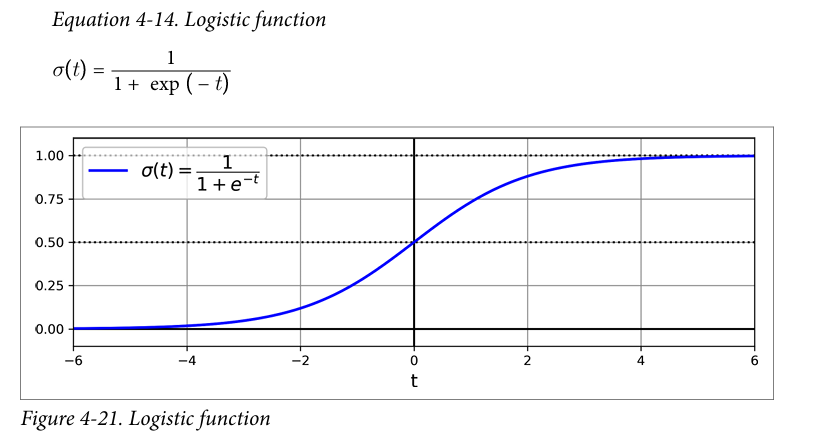

the default threshold is 50% in case of two classes. Training is done to set the parameter vector theta so that model high estimates for positive instances and low for negative instances.

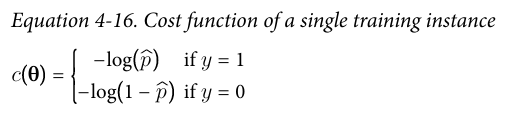

to get the cost for entire dataset

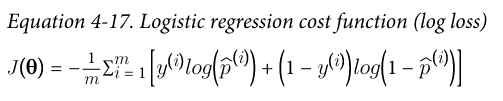



In [17]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
print(list(iris))
print(iris.data.head(3))
print(iris.target.head(3))
print(iris.target_names)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
0    0
1    0
2    0
Name: target, dtype: int32
['setosa' 'versicolor' 'virginica']


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'              #Create X and y containing only petal width for X and yes for virginica or no
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

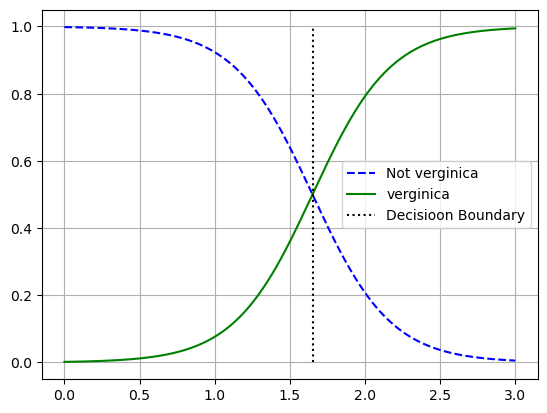

In [31]:
X_new = np.linspace(0,3,1000).reshape(-1,1)     # Create a column vector dataset containing 1000 values between 0 and 3 cm
y_proba = log_reg.predict_proba(X_new)          # Stores the probability for both classes for each instance
decision_boundary = X_new[y_proba[:,1]>=0.5][0,0]  
"""
y_proba[:, 1] gets the probabilities of being "verginica".
y_proba[:, 1] >= 0.5 creates a boolean mask where True corresponds to "verginica" probabilities greater than or equal to 0.5.
X_new[y_proba[:, 1] >= 0.5] filters X_new to return only those values where the classifier predicts "verginica".
[0, 0] selects the first element from the filtered X_new array, which corresponds to the decision boundary.
"""
plt.plot(X_new,y_proba[:,0],"b--",label="Not verginica")
plt.plot(X_new,y_proba[:,1],"g-",label="verginica")
plt.plot([decision_boundary,decision_boundary],[0,1],"k:",label="Decisioon Boundary")
plt.grid()
plt.legend()
plt.show()


In [32]:
print(decision_boundary)
print(log_reg.predict([[1.7],[1.5]]))

1.6516516516516517
[ True False]


Similar to linear regressin, logistic regressions can be regularized using l1 or l2 penalties

## **Softmax Regression**

Logistic regression model can be generalized to support multiple classes directly, without combining multiple binary logistic regression.

How it works?
1) first computes a score sk(x) for each class k for instance x

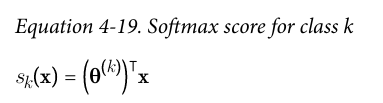

each class has its own dedicated parameter vector theta^k, All these vecots are stored as rows in parameter matrix phi

2) Once computation of score of every class for instance x, you can estimate the probability that the instance belongs to class k by running it through the softmax function

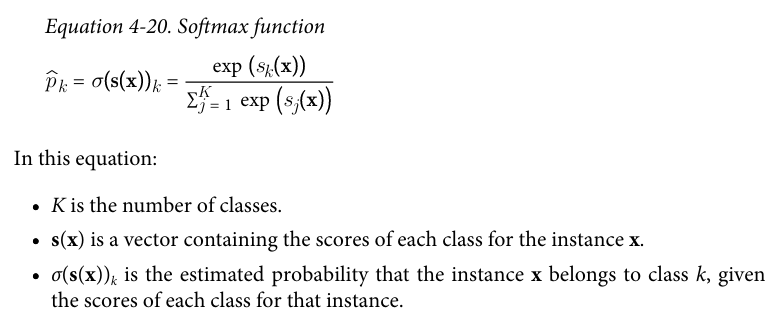

Just like logistic regressor, the predicted class is the one with highest probability, i.e.

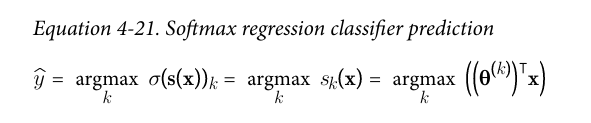

*argmax* returns the k for which maximizes the probability

>!! logistic regression is multiclass not multioutput

Training:

The objective is to have a model that estimates a high probability for the target class and consquently a low probability for the other classes. For that we use cross entropy as the cost function.

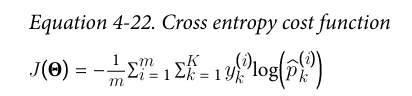

yk^i is the probability that the ith instance belongs to clas k, it is 1 or 0

In [33]:
X = iris.data[["petal length (cm)","petal width (cm)"]].values
y = iris["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
softmax_reg = LogisticRegression(C=30,random_state=42)  # C is the regularization parameter smaller the value more regularization
softmax_reg.fit(X_train,y_train)

LogisticRegression(C=30, random_state=42)

In [36]:
print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]).round(2))

[2]
[[0.   0.04 0.96]]


## **Exercise**
1. Which linear regression training algorithm can you use if you have a training set with millions of features?

    Mini-batches or Schotastic Gradient Descent

2. Suppose the features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?

    Gradient Descent algorithms and SVM, use a scaler

3. Can gradient descent get stuck in a local minimum when training a logistic regression model?

    No, because logistic regression model is a convex optimaztion problem

4. Do all gradient descent algorithms lead to the same model, provided you let them run long enough?

    Yes and no, Batch Gradient descent will lead to same model, Mini-batch and schotastic will reach the global minima but will bounce around instead of stopping completely

5. Suppose you use batch gradient descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely
 going on? How can you fix this?

    If the validation error consistently goes up after every epoch, then one possibility is that the learning rate is too high and the algorithm is diverging. If the training error also goes up, then this is clearly the problem and you should reduce the learning rate. However, if the training error is not going up, then your model is overfitting the training set and you should stop training

6. Is it a good idea to stop mini-batch gradient descent immediately when the validation error goes up?

    No, mini-batch gradient descent is not an algorithm that will stop after reaching a  minima, rather it will keep moving around which is it's advantage as that lets it move out of local optima towards the global optima. Therefore it should not be stopped as soon as validation error goes up but should run for a few epochs storing the best model and go back to it if the validation error still goes up

7. Which gradient descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

    Schotastic GD will lead the vicinity the fastest, but it will not converge, Batch GD will converge, others can be converged by using either a decreasing learning rate or early stopping technique

8. Suppose you are using polynomial regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

    If there is a large gap between the training and validation error then it is likely to be the case of overfitting,
- Regularize the model
- More data
- Reduce the polynomial degree

9. Suppose you are using ridge regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

    High bias likely i.e. the model is not fitting well, model is too simple and cannot fit the data well. To reduce bias, decrease the regularization hyperparameter (α).

10. Why would you want to use:
    a. Ridge regression instead of plain linear regression (i.e., without any regularization)?
    b. Lasso instead of ridge regression?
    c. Elastic net instead of lasso regression?

- Ridge Regression (L2): Use when you want to prevent overfitting but still use all features. It smooths the coefficients without eliminating any.
- Lasso Regression (L1): Use when you want feature selection, as it can shrink some coefficients to zero.
- Elastic Net: Use when you want a combination of Ridge and Lasso, balancing both regularization and feature selection.

- A model with some regularization typically performs better than a model without any regularization, so you should generally prefer Ridge Regression over plain Linear Regression.
- Lasso Regression uses an ℓ₁ penalty, which tends to push the weights down to exactly zero. This leads to sparse models, where all weights are zero except for the most important weights. This is a way to perform feature selection automatically, which is good if you suspect that only a few features actually matter. When you are not sure, you should prefer Ridge Regression.
- Elastic Net is generally preferred over Lasso since Lasso may behave erratically in some cases (when several features are strongly correlated or when there are more features than training instances). However, it does add an extra hyperparameter to tune. If you want Lasso without the erratic behavior, you can just use Elastic Net with an l1_ratio close to 1.

11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two logistic regression classifiers or one softmax regression classifier?

    Two Logistic Regression as softmax regression is multiclass not multioutput

12. Implement batch gradient descent with early stopping for softmax regression without using Scikit-Learn, only NumPy. Use it on a classification task such as the iris dataset.